# Function Words PCA

In [1]:
import sys
import nltk
import numpy as np
import pandas as pd

sys.path.append('..')

from bibermda.tagger.function_words_tagger import calculate_fw_frequencies

2023-05-29 17:16:20.504896: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Setup sample data

Read sample data from two different corpora

In [21]:
nltk.download('brown')
from nltk.corpus import brown

# Chicago Tribune: Society Reportage
news_text = brown.words(categories='news')

# Field: Rattlesnake Ridge
adventure_text = brown.words(categories='humor')

print(len(news_text), len(adventure_text))

[nltk_data] Downloading package brown to /home/kalkiek/nltk_data...
[nltk_data]   Package brown is already up-to-date!


100554 21695


In [22]:
news_text[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

## FW-PCA

**Tag the function words for both corpora**

In [23]:
news_fw_freqs = calculate_fw_frequencies(news_text, token_normalization=1000)
adventure_fw_freqs = calculate_fw_frequencies(adventure_text, token_normalization=1000)

In [24]:
news_fw_freqs.head()

,tag,mean,min_val,max_val,range,std
0,of,28.326733,8,55,47,8.580555
1,yet,0.168317,0,2,2,0.423781
2,if,1.019802,0,5,5,1.234650
3,their,2.287129,0,9,9,1.852676
4,myself,0.029703,0,1,1,0.169767


In [25]:
adventure_fw_freqs.head() 

,tag,mean,min_val,max_val,range,std
0,of,23.545455,13,39,26,5.773980
1,yet,0.181818,0,2,2,0.489560
2,if,1.909091,0,5,5,1.275970
3,their,2.409091,0,9,9,2.639888
4,myself,0.409091,0,2,2,0.576754


**Run PCA and visualize the results**

In [26]:
import pandas as pd

from sklearn.decomposition import PCA

In [27]:
def fw_pca(fw_frequencies_df, components=2, name=None):
    pca = PCA(n_components=components)
    
    X = fw_frequencies_df.drop('tag', axis=1).values
    pca_features = pca.fit_transform(X)

    columns = ['PC{}'.format(i + 1) for i in range(components)]

    pca_df = pd.DataFrame(data=pca_features, columns=columns)
    if name:
        pca_df['name'] = name
    return pca_df, pca.explained_variance_

In [28]:
news_pca, news_explained_var = fw_pca(news_fw_freqs, components=3, name='news')
adventure_pca, adventure_explained_var = fw_pca(adventure_fw_freqs, components=3, name='adventure')

In [29]:
pca_df = pd.concat([news_pca, adventure_pca])
pca_df.head()

,PC1,PC2,PC3,name
0,64.596024,-5.023548,-1.598869,news
1,-10.925472,2.120518,-0.106736,news
2,-6.755141,0.739414,-0.113664,news
3,-1.190669,-0.997661,-0.120598,news
4,-12.253317,2.669250,-0.202617,news


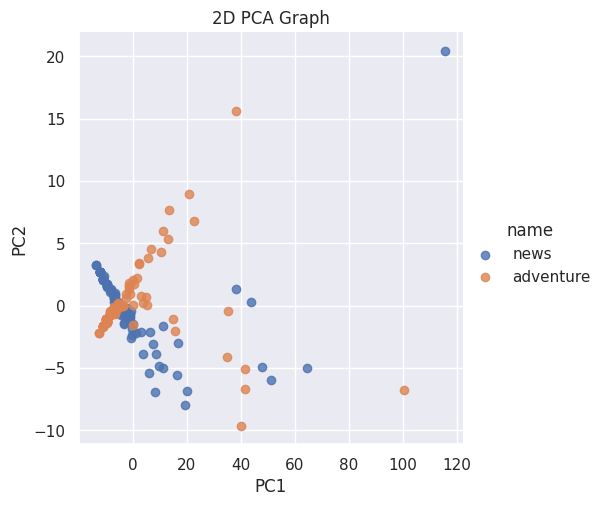

In [32]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='name', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

In [15]:
news_explained_var

array([362.63079161,  11.54530833,   0.52698648])

In [16]:
adventure_explained_var

array([421.34783861,  13.76431037,   1.15873027])

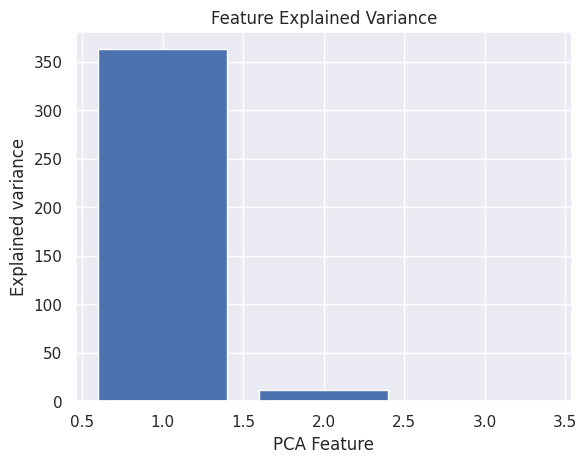

In [17]:
plt.bar(
    range(1,len(news_explained_var)+1),
    news_explained_var
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()